# Module 1: Introduction to Scikit-Learn

## Section 2: Supervised Learning Algorithms

### Part 6: Polynomial Regression

In this part, we will explore Polynomial regression, a type of regression that extends the linear regression model to capture non-linear relationships.

### 6.1 Understanding Polynomial regression

Polynomial regression is a type of regression that extends the linear regression model to capture non-linear relationships between the independent and dependent variables. It achieves this by introducing polynomial terms (i.e., higher-order features) to the data, allowing the model to fit more complex patterns.

In Scikit-Learn, polynomial regression can be easily implemented using the PolynomialFeatures transformer and a linear regression model. The PolynomialFeatures transformer is used to create polynomial features from the original features, and then these expanded features are used to fit a linear regression model.

In simple terms, polynomial features are additional features that are derived from the original feature by raising it to various powers (e.g., square, cube) and also by multiplying different combinations of features together. This process allows us to capture non-linear relationships between the input feature X and the target variable y.

For example, setting the degree to 3 means we will generate features up to X^3. If we have X = [x1], with degree=3, the PolynomialFeatures will generate X_poly = [1, x1, x1^2, x1^3].  The first feature (1) is the constant term, followed by x1 (original feature), x1^2 (square of the original feature), and x1^3 (cube of the original feature). 

These polynomial features are then used as input for the polynomial regression model, which allows the model to capture non-linear relationships between X and the target variable y.

Advantages of Polynomial Regression
- Flexibility: Polynomial regression can capture non-linear relationships between variables, making it more versatile than simple linear regression.
- Improved Fit: By introducing polynomial terms, the model can better fit complex patterns in the data, potentially leading to higher predictive accuracy.
- Interpretability: Although polynomial regression introduces more features, the coefficients can still provide insights into the relationships between variables.

Disadvantages of Polynomial Regression
- Overfitting: Higher-order polynomial terms can lead to overfitting, especially when dealing with a small dataset or a high degree of polynomial expansion.
- Increased Complexity: The model complexity increases with higher-degree polynomials, making it more computationally expensive and harder to interpret.
- Extrapolation: Polynomial regression is not suitable for extrapolating beyond the range of the training data, as it may produce unreliable predictions.

### 6.2 Training end Evaluation

Here's a step-by-step implementation of polynomial regression using Scikit-Learn:

Linear Regression Mean Squared Error: 0.18761966114981837
Linear Regression R-squared (R2) Score: 0.6118222666775657

Polynomial Regression Mean Squared Error: 0.01158829487034302
Polynomial Regression R-squared (R2) Score: 0.976024271612719


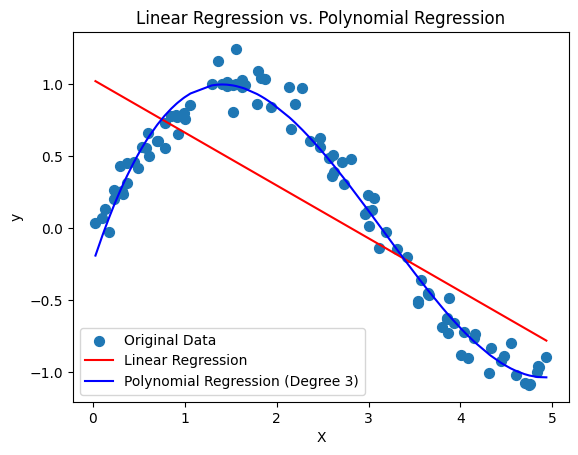

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample data with a non-linear relationship
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1
# Plot the original data points
plt.scatter(X, y, s=50, label='Original Data')

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Make predictions
y_pred = lin_reg.predict(X)
# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared (R2) Score:", r2)
# Plot the linear regression line
plt.plot(X, y_pred, color='red', label='Linear Regression')

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
# Fit linear regression model
lin_reg.fit(X_poly, y)
# Make predictions
y_pred = lin_reg.predict(X_poly)
# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\nPolynomial Regression Mean Squared Error:", mse)
print("Polynomial Regression R-squared (R2) Score:", r2)

# Plot the polynomial regression line
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_pred_poly = lin_reg.predict(X_plot_poly)
plt.plot(X, y_pred, color='blue', label='Polynomial Regression (Degree 3)')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression vs. Polynomial Regression')
plt.show()

In this example, we have a sample dataset with a non-linear relationship between the input feature X and the target variable y. Specifically, the relationship follows a sine curve with some random noise added to the data. We first fit a linear regression model to the data. The linear regression line is represented by the red line on the plot. As expected, the linear regression line does not capture the non-linear nature of the data well. The mean squared error (MSE) and R-squared (R2) score are calculated to evaluate the performance of the linear regression model. To capture the non-linear relationship between X and y, we create polynomial features from the original feature X. In this case, we use a degree of 3 for the polynomial features. This means we generate polynomial features up to X^3, allowing the model to fit a cubic function to the data.

By comparing the linear regression line (red) and the polynomial regression line (blue), we can clearly see how the polynomial regression better fits the data points, especially in regions with strong non-linear relationships. The polynomial regression line follows the general shape of the sine curve, providing a more accurate representation of the data.

In summary, the polynomial regression (degree 3) outperforms the linear regression in this case, as it can capture the non-linear relationship more accurately, leading to a significantly lower MSE and a much higher R-squared score.

### 6.3 Hyperparameter tunning

In polynomial regression, the main hyperparameter to tune is the degree of the polynomial features. 

Overfitting is a common concern when using higher-degree polynomial features in polynomial regression. As the degree of the polynomial increases, the polynomial regression model can start to memorize the noise in the training data rather than capturing the underlying patterns. However, this increased flexibility comes at the cost of increased complexity. As a result, the model may perform very well on the training data but fail to generalize to new, unseen data. Overfitting.

Consequently, the model becomes too specific to the training data and loses its ability to generalize to new data points.

To avoid overfitting in polynomial regression, it's essential to find the right balance between model complexity (degree of the polynomial) and generalization. One common approach is to use techniques like cross-validation to tune the hyperparameters, such as the degree of the polynomial, and select the value that provides the best trade-off between bias and variance. By using cross-validation to evaluate the model's performance on different subsets of the data, you can identify the degree that achieves good performance on both the training and validation sets. This helps you choose a degree that is less prone to overfitting and can generalize better to new data.

#### Example

We are indeed changing the degree of the dataset features, and it's not a hyperparameter of the model itself. Using a for loop to simulate the grid search for different degrees is a more appropriate approach.

Using cross-validation on the degree of polynomial features is possible, but it can be computationally expensive and time-consuming. The reason is that cross-validation involves splitting the data into multiple folds and training the model on each fold while validating on the remaining data. When searching for the best degree of polynomial features, this process would need to be repeated for each degree being tested.

For each fold, the model would have to create polynomial features with the given degree, fit the regression model, and evaluate its performance. This process can be quite slow, especially when the dataset is large or the degree range is wide.

Instead of using cross-validation directly on the degree, a more efficient approach is to use cross-validation to evaluate the performance of the polynomial regression model with pre-selected degrees. This way, you can avoid repeating the polynomial feature creation for each fold, significantly reducing computation time.

In the following provided code, the for loop tests different degrees of polynomial features and calculates the mean squared error and R-squared score for each degree using cross-validation. This approach is a practical compromise to find the best degree without the excessive computational burden of using cross-validation directly on the degree parameter.

Linear Regression
	Mean Squared Error: 0.18761966114981837
	R-squared (R2) Score: 0.6118222666775657
Polynomial Regression (Degree 2)
	Mean Squared Error: 0.06008584881795107
	R-squared (R2) Score: 0.875684731248491
Polynomial Regression (Degree 3)
	Mean Squared Error: 0.01158829487034302
	R-squared (R2) Score: 0.976024271612719
Polynomial Regression (Degree 4)
	Mean Squared Error: 0.008850127976552921
	R-squared (R2) Score: 0.9816894317125511
Polynomial Regression (Degree 5)
	Mean Squared Error: 0.008080570790877355
	R-squared (R2) Score: 0.9832816154003736
Polynomial Regression (Degree 6)
	Mean Squared Error: 0.00807663293340015
	R-squared (R2) Score: 0.9832897626733208
Polynomial Regression (Degree 7)
	Mean Squared Error: 0.007907187354214902
	R-squared (R2) Score: 0.9836403389426016

Best Polynomial Regression (Degree 7)
	Mean Squared Error: 0.007907187354214902
	R-squared (R2) Score: 0.9836403389426016


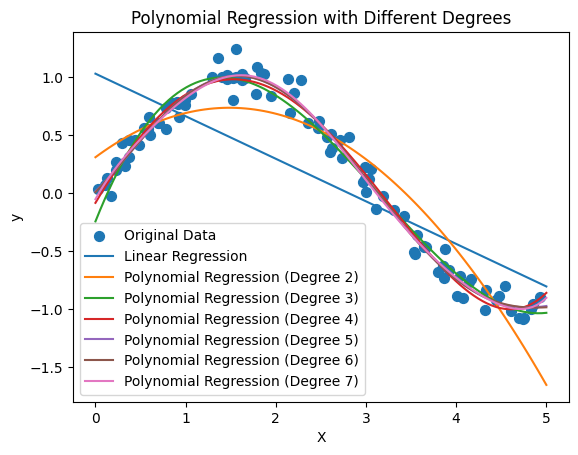

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Sample data with a non-linear relationship
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1
# Plot the original data points
plt.scatter(X, y, s=50, label='Original Data')

# Define the list of degrees to test
degrees = [1, 2, 3, 4, 5, 6, 7]
best_degree = None
best_mse = float('inf')
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    # Fit linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    # Make predictions
    y_pred = lin_reg.predict(X_poly)
    # Calculate mean squared error and R-squared score
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    # Print the results for the current degree
    if degree == 1:
        print("Linear Regression".format(degree))
    else:
        print("Polynomial Regression (Degree {})".format(degree))
    print("\tMean Squared Error:", mse)
    print("\tR-squared (R2) Score:", r2)
    # Plot the polynomial regression line for the current degree
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_pred_poly = lin_reg.predict(X_plot_poly)
    if degree == 1:
        plt.plot(X_plot, y_pred_poly, label='Linear Regression')
    else:
        plt.plot(X_plot, y_pred_poly, label='Polynomial Regression (Degree {})'.format(degree))
    # Update the best degree if necessary
    if mse < best_mse:
        best_mse = mse
        best_degree = degree

# Create polynomial features with the best degree
best_poly = PolynomialFeatures(degree=best_degree)
X_poly = best_poly.fit_transform(X)
# Fit the linear regression model with the best polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# Make predictions
y_pred = lin_reg.predict(X_poly)
# Calculate mean squared error and R-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\nBest Polynomial Regression (Degree {})".format(degree))
print("\tMean Squared Error:", mse)
print("\tR-squared (R2) Score:", r2)

# Plot the best polynomial regression line
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = best_poly.transform(X_plot)
y_pred_poly = lin_reg.predict(X_plot_poly)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with Different Degrees')
plt.show()

The code performs polynomial regression on a sample dataset with a non-linear relationship. It tests different degrees of polynomial features using a for loop and plots the resulting polynomial regression lines. The mean squared error and R-squared score are calculated for each degree. The best degree with the lowest mean squared error is then selected.

Hyperparameter tuning allows us to find the optimal complexity of the polynomial model, balancing between overfitting and underfitting. By selecting the best polynomial degree, we can build a polynomial regression model that generalizes well to unseen data and captures the underlying non-linear relationship in the data more accurately.

### 6.4 Summary

Overall, Polynomial regression is a valuable technique that extends linear regression to capture complex like non-linear data patterns.

Remember that the choice of the polynomial degree (degree parameter in PolynomialFeatures) is essential to balance model complexity and overfitting.

Overfitting is a concern in polynomial regression, especially as the degree of the polynomial increases. Cross-validation is a valuable tool to help find the optimal degree and prevent overfitting by selecting a model that performs well on unseen data. Experiment with different degrees and evaluate the model's performance to find the optimal degree for your specific dataset.